#  AI HW6

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Q1 Perceptron (20pts)

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.

<img src ="image/percep.png" >

Like most other techniques for training linear classifiers, the perceptron generalizes naturally to multiclass. Each training instance is a feature vector $\normalsize x$ and a class label $\normalsize y^*$. Each class has a weight vector $\normalsize w_{y}$. The feature vector is multiplied by the weight vectors and score of class $\normalsize y$ will be $\normalsize x.w_{y}$. The resulting scores is used to choose the predicted class:
\begin{equation}
\normalsize
\hat{y} = \underset{y}{\operatorname{argmax}} x.w_{y}
\end{equation}

For learning, perceptron starts with all weights equal to zero and iterates over the examples one by one, predicting an output for each. It leaves the weights unchanged when the predicted output matches the target. If the prediction is wrong, it lowers the score of wrong answer and raise the score of right answer. Therefore, the updates become:
\begin{equation}
\normalsize
w_{\hat{y}} = w_{\hat{y}} - x \\
\normalsize
w_{y^*} = w_{y^*} + x
\end{equation}
where $\hat{y}$ is the predicted wrong class and $y^*$ is the right class.

Open `perceptron.py` and complete the code of the perceptron model in it.

In [ ]:
import numpy as np


class Perceptron:
    def __init__(self, feature_dim, num_classes):
        """
        in this constructor you have to initialize the weights of the model with zeros. Do not forget to put 
        the bias term! 
        """
        self.weights = np.zeros((feature_dim + 1, num_classes)) # each column indicates weights for one of the classes
        
        
    def train(self, feature_vector, y):
        """
        this function gets a single training feature vector (feature_vector) with its label (y) and adjusts 
        the weights of the model with perceptron algorithm. 
        Hint: use self.predict() in your implementation.
        """
        y_hat = self.predict(feature_vector)
        if y_hat != y:
            self.weights[:, y_hat] -= feature_vector
            self.weights[:, y] += feature_vector
 

    def predict(self, feature_vector):
        """
        returns the predicted class (y-hat) for a single instance (feature vector).
        Hint: use np.argmax().
        """
        result = np.dot(feature_vector, self.weights)
        y_hat = np.argmax(result)
        return y_hat

In [ ]:
# from perceptron import Perceptron
import os
from matplotlib import pyplot as plt
model = Perceptron(784, 10)

In [ ]:
def load_data(root_path):
    train_data_file_names = ['train{}.npy'.format(x) for x in range(1, 6)]
    test_data_file_name = 'test.npy'
    test_labels_file_name = 'labels_test.npy'
    train_labels_file_name = 'labels_train.npy'
    
    train_data_list = []
    for file_name in train_data_file_names:
        file_path = os.path.join(root_path, file_name)
        train_data_list.append(np.load(file_path))
        
    test_data = np.load(os.path.join(root_path, test_data_file_name))
    test_labels = np.load(os.path.join(root_path, test_labels_file_name))
    train_labels = np.load(os.path.join(root_path, train_labels_file_name))
    
    return test_data, train_data_list, test_labels, train_labels


In [ ]:
dir = 'drive/My Drive/AI-HW6-fall99/'
np.random.seed(42)

test_data, train_data_list, test_labels, train_labels = load_data(dir + 'data')

####################################TODO############################################
train_data = np.concatenate(train_data_list)
#################################################################################

print(train_data.shape)  # Expected ouput: (60000, 784)
print(test_data.shape)  # Expected ouput: (10000, 784)
print(test_labels.shape)  # Expected ouput: (10000,)
print(train_labels.shape)  # Expected ouput: (60000,)


X_test, y_test = test_data, test_labels

#####################################TODO############################################
import random 
inds = [i for i in range(len(train_data))]
random.shuffle(inds)
val_inds = inds[:1000]
train_inds = inds[1000:]
X_train, X_val = np.asarray([train_data[i] for i in train_inds]), np.asarray([train_data[i] for i in val_inds])
y_train, y_val = np.asarray([train_labels[i] for i in train_inds]), np.asarray([train_labels[i] for i in val_inds])
#################################################################################

print(X_train.shape, X_val.shape)  # Expected ouput: (59000, 784) (1000, 784)
print(y_train.shape, y_val.shape)  # Expected ouput: (59000,) (1000,)

(60000, 784)
(10000, 784)
(10000,)
(60000,)
(59000, 784) (1000, 784)
(59000,) (1000,)


In [ ]:
# adding 1s to the end of feature vectors to be multiplied by bias term of weights
# WARNING: RUN THIS CELL ONLY ONCE!
X_val = np.insert(X_val, 0, 1, axis=1)
X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
print(X_train.shape)  # Expected ouput: (59000, 785)
print(X_val.shape)  # Expected ouput: (1000, 785)
print(X_test.shape)  # Expected ouput: (10000, 785)

(59000, 785)
(1000, 785)
(10000, 785)


Now let's train your model on the training set. Meanwhile, the accuracy on the validation set is printed out to make sure that the model is training well. Your model has to reach an accuracy higher than 85% on the validation set. We have provided this code for you.

In [ ]:
val_accs = []
for i, (x, y) in enumerate(zip(X_train, y_train)):
    model.train(x, y)
    if i % 1000 == 0:
        val_res =  [model.predict(x_val) == y_val for x_val, y_val in zip(X_val, y_val)]
        val_acc = np.sum(val_res) / len(val_res)
        val_accs.append(val_acc*100)  # recording the accuray to be plotted after training 
        print("iteration number %d, accuracy on validation set: %.2f%%" % (i, 100*val_acc))

iteration number 0, accuracy on validation set: 8.70%
iteration number 1000, accuracy on validation set: 76.60%
iteration number 2000, accuracy on validation set: 76.30%
iteration number 3000, accuracy on validation set: 73.30%
iteration number 4000, accuracy on validation set: 82.50%
iteration number 5000, accuracy on validation set: 81.20%
iteration number 6000, accuracy on validation set: 82.70%
iteration number 7000, accuracy on validation set: 85.80%
iteration number 8000, accuracy on validation set: 82.60%
iteration number 9000, accuracy on validation set: 82.30%
iteration number 10000, accuracy on validation set: 84.50%
iteration number 11000, accuracy on validation set: 84.00%
iteration number 12000, accuracy on validation set: 86.20%
iteration number 13000, accuracy on validation set: 86.20%
iteration number 14000, accuracy on validation set: 82.40%
iteration number 15000, accuracy on validation set: 75.60%
iteration number 16000, accuracy on validation set: 84.50%
iteration n

Let's plot the accuracy on validation set:

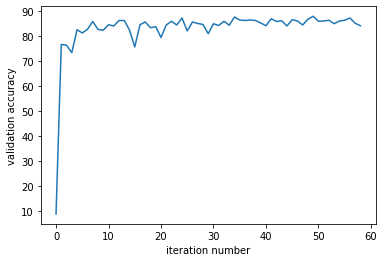

In [ ]:
plt.plot(val_accs)
plt.ylabel('validation accuracy')
plt.xlabel('iteration number')
plt.show()

Finally let's test your model on the test set. You have to get an accuracy above 85%.

In [ ]:
test_res =  [model.predict(x_test) == y_test for x_test, y_test in zip(X_test, y_test)]
test_acc = np.sum(test_res) / len(test_res)
print("accuracy on test set: %.2f%%" % (100*test_acc))

accuracy on test set: 88.17%


## Q2 Linear Regression (20pts)

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 

We're going to predict the price of houses using the dataset provided by multiple linear regression.

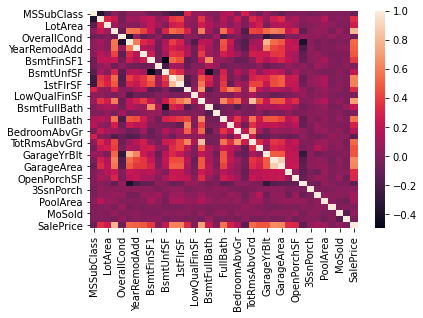

Top columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


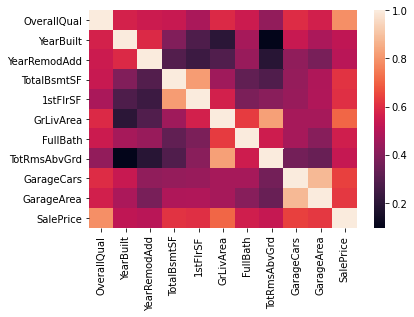

In [ ]:
corr = data.corr() # calculating correlation of columns
sns.heatmap(corr)
plt.show()

num_columns = 10

corr = corr.to_numpy()
threshold = sorted(corr[:,-1])[-(num_columns+1)]  
columns = (corr[:,-1] >= threshold) # selecting top columns based on their correlation with house price
selected_columns = data.columns[columns]
new_data = data[selected_columns]

print("Top columns:",[column for column in data.columns][:-1])

corr = new_data.corr()
sns.heatmap(corr)
plt.show()

X = new_data.iloc[:,:-1].to_numpy() # removing price column from X
X = np.append(X, np.ones((X.shape[0],1)), 1)  # adding bias column to X

In [ ]:
w = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X), y)) # linear regression
print("weight vector:", w)

weight vector: [ 1.96045898e+04  2.68240707e+02  2.96481161e+02  1.98650991e+01
  1.41737355e+01  5.12971178e+01 -6.79087146e+03  3.31050771e+01
  1.04179010e+04  1.49475334e+01 -1.18619377e+06]


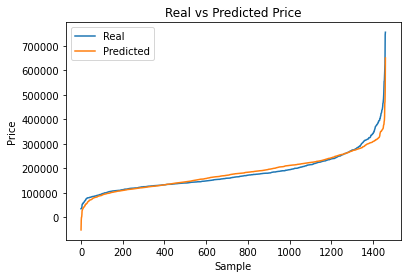

In [ ]:
real_y = np.copy(y)
pred_y = np.matmul(X,w)

tmp = np.c_[real_y, pred_y]
tmp = np.sort(tmp, axis=0) # sortting based on real prices to get a nicer graph

real_y = tmp[:,0]
pred_y = tmp[:,1]

plt.plot(range(X.shape[0]), real_y, label='Real')
plt.plot(range(X.shape[0]), pred_y, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Real vs Predicted Price')
plt.legend()
plt.show()

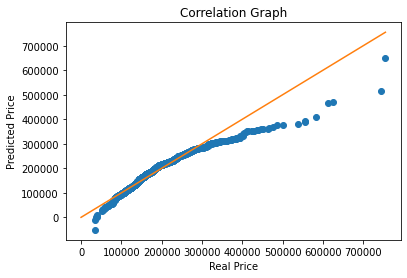

In [ ]:
plt.plot(real_y, pred_y, 'o')
plt.plot([0, np.max(real_y)], [0, np.max(real_y)])
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Correlation Graph')
plt.show()